In [2]:
import glob
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection, PatchCollection
from matplotlib import path, colors
from matplotlib.patches import Circle, Polygon
import skimage.io as io
from scipy import stats
import pandas as pd
from datetime import datetime, timedelta
from scipy.ndimage import generic_filter
import numba as nb
from scipy.interpolate import RegularGridInterpolator
from os.path import exists

In [3]:
from caribbean_map import *

In [4]:
%load_ext autoreload
%autoreload 2

import beachings

In [370]:
ds_c = xr.open_dataset('../data/process/country_GLBv0.08.nc')
countries_caribbean = ds_c.country_list.data
countries_full = pd.read_csv('../data/raw/temp/country_reference_list.csv', header=None, usecols=[1]).values[:,0]
countries_global_index = np.array([int(np.where(c == countries_full)[0])+1 for c in countries_caribbean])

In [371]:
countries_caribbean

array(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Cuba', 'Dominica',
       'Dominican Republic', 'Grenada', 'Haiti', 'Jamaica',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Trinidad and Tobago',
       'Anguilla', 'Aruba', 'Bonaire, Sint Eustatius and Saba',
       'British Virgin Islands', 'Cayman Islands', 'Curaçao',
       'Guadeloupe', 'Martinique', 'Montserrat', 'Puerto Rico',
       'Saint-Barthélemy', 'Saint-Martin', 'Sint Maarten',
       'Turks and Caicos Islands', 'Virgin Islands, U.S.', 'Mexico',
       'United States', 'Venezuela', 'Belize', 'Colombia', 'Costa Rica',
       'Guatemala', 'Guyana', 'Honduras', 'Nicaragua', 'Panama',
       'Suriname'], dtype=object)

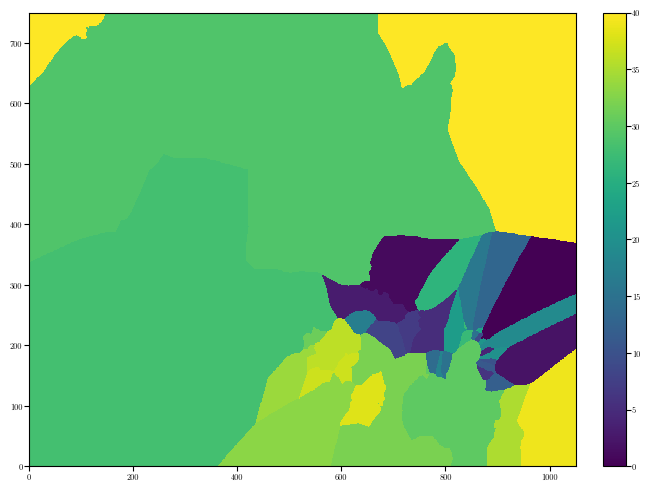

In [96]:
plt.pcolormesh(ds_c.country)
plt.colorbar()

In [137]:
# test
pts = np.array([[-84.322620, 30.5], # USA GoM ~1deg from coast
                [-84.322620, 23.5],  # Close to Cuba
                [-62.068762, 16.112115], # Guadeloupe
               ]) 

cid = beachings.global_country_id(pts[:,0], pts[:,1])

for i in cid:
    print(countries_full[i])

United States
Cuba
Guadeloupe


In [161]:
countries_caribbean[0]

'Antigua and Barbuda'

In [157]:
i = countries_global_index[0]

In [315]:
ds = pd.read_csv('beachings_c1.csv', delimiter=', ', engine='python')

In [192]:
ds.mass0.sum()

2289365.2180000003

In [193]:
ds.mass1.sum()

2179903.547999998

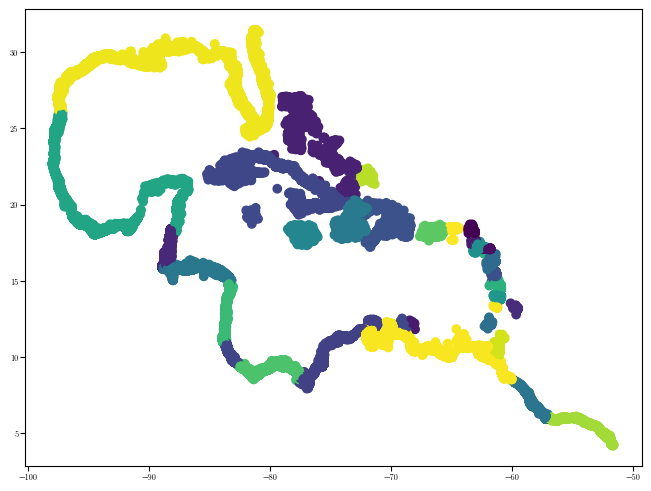

In [197]:
plt.scatter(ds.lon1, ds.lat1, c=ds.cid1)

In [ ]:
for year in range(2010, 2022):
        for month in range(1,13):

In [544]:
mass_exported = np.zeros_like(countries_caribbean)

# first [:11314] lines are in the Caribbean region
# extra lines are the particles entering from other countries
ds_origin = pd.read_csv(f'releases/particles_info_20100101.csv', parse_dates=['date'])[:11314]  

for i,cname in enumerate(countries_caribbean):
    print(cname)
    j = countries_global_index[i]

Antigua and Barbuda
Bahamas
Barbados
Cuba
Dominica
Dominican Republic
Grenada
Haiti
Jamaica
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Trinidad and Tobago
Anguilla
Aruba
Bonaire, Sint Eustatius and Saba
British Virgin Islands
Cayman Islands
Curaçao
Guadeloupe
Martinique
Montserrat
Puerto Rico
Saint-Barthélemy
Saint-Martin
Sint Maarten
Turks and Caicos Islands
Virgin Islands, U.S.
Mexico
United States
Venezuela
Belize
Colombia
Costa Rica
Guatemala
Guyana
Honduras
Nicaragua
Panama
Suriname


In [546]:
ds_origin[:11315]

,country id,longitude,latitude,date,weight [ton]
0,208,-53.850037,5.812482,2010-01-01,0.482616
1,208,-53.803942,5.812480,2010-01-01,0.482616
2,208,-53.821440,5.804647,2010-01-01,0.482616
3,208,-53.832107,5.869294,2010-01-01,0.482616
4,208,-56.231911,6.026595,2010-01-01,0.361570
...,...,...,...,...,...
11309,235,-94.626595,29.247643,2010-01-01,0.076449
11310,235,-94.550089,29.356141,2010-01-01,0.300359
11311,235,-89.433074,29.493441,2010-01-01,0.378320
11312,235,-89.341050,30.109025,2010-01-01,0.132652


In [554]:
# group total mass by country
ds_origin_c = ds_origin[["country id","weight [ton]"]][:11315].groupby(["country id"]).sum().sort_values("weight [ton]", ascending=False)
ds_origin_c["name"] = [countries_full[i-1] for i in ds_origin_c.index]
ds_origin_c["weight yearly [ton]"] = ds_origin_c["weight [ton]"]*12

Text(0, 0.5, 'Beached marine litter [tons]')

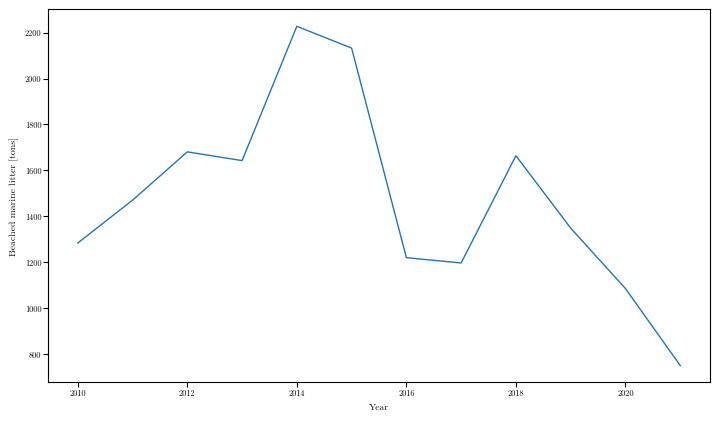

In [ ]:
fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1,1,1)

ax.plot(range(2010, 2022), mass_received, linewidth=1, label=cname)

ax.set_xlabel('Year')
ax.set_ylabel('Beached marine litter [tons]')

In [316]:
ds = pd.read_csv('beachings_c1.csv', delimiter=', ', engine='python')

Text(0, 0.5, 'Beached marine litter [tons]')

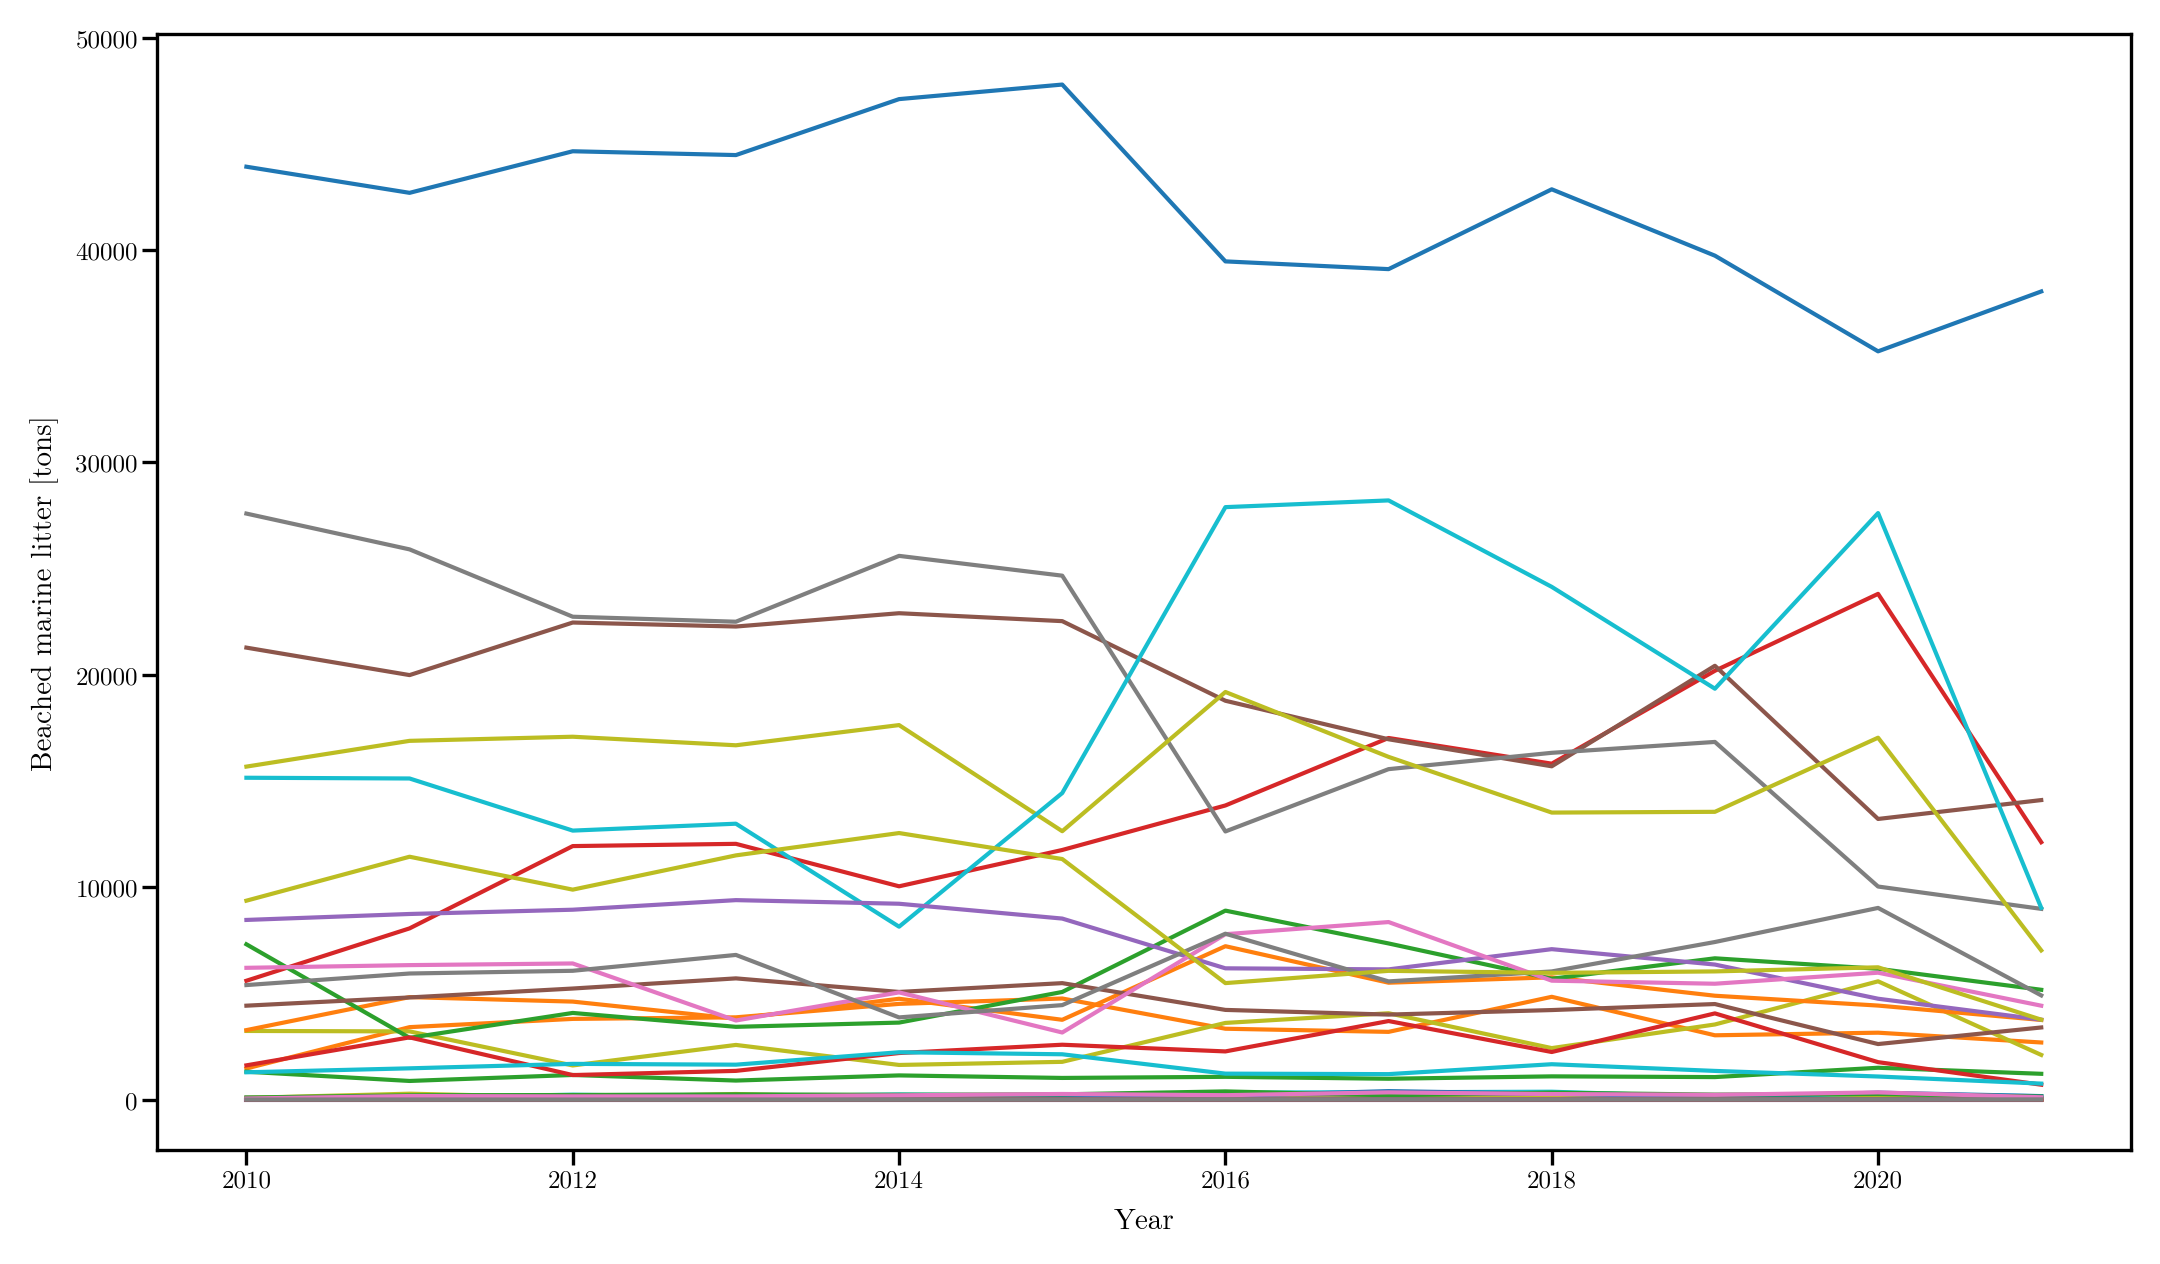

In [274]:
fig = plt.figure(figsize=fs,dpi=300)
ax = fig.add_subplot(1,1,1)

for i,cname in enumerate(countries_caribbean):
    #print(cname)
    mass_received = []
    for y in range(2010, 2022):
        ds_y = ds.loc[np.array([d[:4] for d in ds.release]) == str(y)]
        j = countries_global_index[i]
        mass_received.append(ds_y.loc[ds_y.cid1 == j].mass1.sum())
    ax.plot(range(2010, 2022), mass_received, linewidth=1, label=cname)
    
ax.set_xlabel('Year')
ax.set_ylabel('Beached marine litter [tons]')

In [552]:
ds = pd.read_csv('beachings_c1.csv', delimiter=', ', engine='python')

In [553]:
years = np.arange(2016, 2021)

for i,cname in enumerate(countries_caribbean):
    j = countries_global_index[i]
    
    # exported to the region
    ds_c_e = ds.loc[ds.cid0 == j]
    ds_c_e = ds_c_e.loc[np.isin(np.array([int(d[:4]) for d in ds_c_e.release]), years)]
    
    # ratio in/out of the region
    try:
        total_prod = ds_origin_c.loc[ds_origin_c["name"] == cname]["weight yearly [ton]"].item()
        average_exp = ds_c_e.mass0.sum()/len(years)  # stayed in the region (beached in the region is mass1)
        print(f'{cname} ({average_exp/total_prod*100:.2f}% of {total_prod:.1f} t/year)')
    except:
        total_prod = 0
        print(f'{cname}')

    countries_e = ds_c_e[["cid1","mass1"]].groupby(["cid1"]).sum().sort_values("mass1", ascending=False)
    countries_e["name"] = [countries_full[i-1] for i in countries_e.index]
    print(f'\tTo\t', end='')
    
    i, perc = 0, 0.0
    while i<len(countries_e) and (i<3 or perc < 0.9):
        name_i, perc_i = countries_e.iloc[[i]].name.item(), countries_e.iloc[[i]].mass1.item()/countries_e.mass1.sum()
        print(f'{name_i} ({perc_i*100:.2f}%)', end=' ')
        i += 1
        perc += perc_i
    print('')
    
    # received
    ds_c_r = ds.loc[ds.cid1 == j]
    ds_c_r = ds_c_r.loc[np.isin(np.array([int(d[:4]) for d in ds_c_r.release]), years)]
        
    countries_r = ds_c_r[["cid0","mass0"]].groupby(["cid0"]).sum().sort_values("mass0", ascending=False)
    countries_r["name"] = [countries_full[i-1] for i in countries_r.index]
    print(f'\tFrom\t', end='')
    
    i, perc = 0, 0.0
    while i<len(countries_r) and (i<3 or perc < 0.9):
        name_i, perc_i = countries_r.iloc[[i]].name.item(), countries_r.iloc[[i]].mass0.item()/countries_r.mass0.sum()
        print(f'{name_i} ({perc_i*100:.2f}%)', end=' ')
        i += 1
        perc += perc_i
    print('')
    print(f'\tDays \t{ds_c_e.days.mean():.1f} \t{ds_c_r.days.mean():.1f}')
    
    print("\n\tYears \tExp [tons/y] \tRec [tons/y]")
    for y in years:        
        # exported to the region
        ds_c_e_y = ds_c_e.loc[np.array([int(d[:4]) for d in ds_c_e.release]) == y] # one year
        mass_exported_y = ds_c_e_y.mass0.sum()

        # received
        ds_c_r_y = ds_c_r.loc[np.array([int(d[:4]) for d in ds_c_r.release]) == y] # one year
        mass_received_y = ds_c_r_y.mass1.sum()
        print(f'\t{y} \t{mass_exported_y:0.3f} \t{mass_received_y:0.3f}')

    # yearly averages
    print(f'\tAvg \t{ds_c_e.mass0.sum()/len(years):0.3f} \t{ds_c_r.mass1.sum()/len(years):0.3f}\n')

Antigua and Barbuda (61.78% of 188.4 t/year)
	To	Dominican Republic (20.78%) Cuba (16.45%) Puerto Rico (14.57%) Bahamas (10.38%) United States (9.02%) Haiti (5.63%) British Virgin Islands (3.92%) Saint Kitts and Nevis (3.63%) Antigua and Barbuda (3.51%) Turks and Caicos Islands (2.67%) 
	From	Morocco (33.29%) Antigua and Barbuda (20.04%) Senegal (14.99%) Brazil (11.28%) Suriname (3.10%) Gambia (2.40%) Mauritania (2.07%) Haiti (1.77%) Liberia (1.63%) 
	Days 	139.6 	94.8

	Years 	Exp [tons/y] 	Rec [tons/y]
	2016 	160.531 	23.430
	2017 	120.009 	15.574
	2018 	96.127 	22.553
	2019 	101.271 	5.296
	2020 	103.908 	24.352
	Avg 	116.369 	18.241

Bahamas (29.54% of 497.1 t/year)
	To	Bahamas (82.35%) United States (15.05%) Cuba (1.70%) 
	From	Dominican Republic (38.34%) Haiti (29.44%) Morocco (12.72%) United States (3.72%) Bahamas (3.09%) Jamaica (2.09%) Venezuela (1.60%) 
	Days 	89.3 	277.1

	Years 	Exp [tons/y] 	Rec [tons/y]
	2016 	163.936 	3334.931
	2017 	139.877 	3187.320
	2018 	164.286 	483

In [492]:
countries_e

,mass1,name
cid1,,
64,112.288,Dominican Republic
54,88.870,Cuba
181,78.744,Puerto Rico
26,56.088,Bahamas
235,48.742,United States
101,30.397,Haiti
240,21.201,British Virgin Islands
122,19.600,Saint Kitts and Nevis
14,18.960,Antigua and Barbuda


In [302]:
ds_c

,release,land,cid0,lon0,lat0,mass0,days,cid1,lon1,lat1,mass1
662005,2015-01-01,1,208,-53.850037,5.812482,0.483,30,208,-54.094181,5.837662,0.475
662006,2015-01-01,1,208,-53.803942,5.812480,0.483,30,208,-54.099419,5.797292,0.475
662007,2015-01-01,1,208,-53.821440,5.804647,0.483,30,208,-54.103092,5.801473,0.475
662008,2015-01-01,1,208,-53.832107,5.869294,0.483,30,208,-54.335541,5.884037,0.475
662009,2015-01-01,1,208,-56.231911,6.026595,0.362,30,208,-56.772110,5.934735,0.356
...,...,...,...,...,...,...,...,...,...,...,...
1596073,2021-12-01,1,235,-80.134467,25.550736,0.057,30,235,-80.161263,25.853382,0.056
1596074,2021-12-01,1,235,-89.974190,29.193899,0.130,30,235,-90.167816,29.177237,0.128
1596075,2021-12-01,1,235,-94.550089,29.356141,0.300,30,235,-94.497681,29.595991,0.295
1596076,2021-12-01,1,235,-89.433074,29.493441,0.378,30,235,-89.429070,29.767811,0.372


In [ ]:
np.unique(ttt.cid0.values, return_counts=True)

In [281]:
ttt = ds_y.loc[ds_y.cid1 == j]